<a href="https://colab.research.google.com/github/Hsynyvz/Machine-Deep-learning/blob/main/USA_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


In [2]:
np.random.seed(42)

In [3]:
df  = pd.read_csv("/content/drive/MyDrive/Machine_Learning /USA_Housing_Price_Prediction/USA_Housing.csv")

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.shape

(5000, 7)

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#Exploratory Data Analysis (EDA)

In [10]:
#sns.pairplot(df)

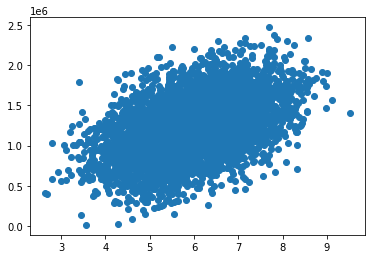

In [11]:
plt.scatter(df["Avg. Area House Age"], df["Price"])


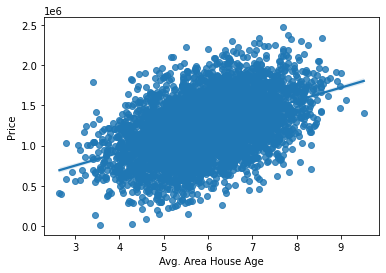

In [12]:
sns.regplot(x = df["Avg. Area House Age"], y = df["Price"])
plt.show()

In [13]:
X = df.drop(["Price" , "Address"], axis = 1 )

In [14]:
y = df.Price

In [15]:
X.shape,  y.shape

((5000, 5), (5000,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Preparing Data For Linear Regression

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [19]:
print(lin_reg.intercept_)

1228219.1492415662


In [20]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


In [21]:
pred = lin_reg.predict(X_test)

In [22]:
df1 = pd.DataFrame({'True Values': y_test, 'Predicted Values': pred})
df1.head()

,True Values,Predicted Values
1501,1.339096e+06,1.308536e+06
2586,1.251794e+06,1.237123e+06
2653,1.340095e+06,1.243836e+06
1055,1.431508e+06,1.229242e+06
705,1.042374e+06,1.059353e+06


In [23]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('...')
    


In [24]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_______')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n____')
print_evaluate(y_train, train_pred)

Test set evaluation:
_______
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square 0.9146818498754016
...
Train set evaluation:
____
MAE: 81480.4997317489
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square 0.9192986579075526
...


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

history = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=16,
              epochs=100)

Epoch 1/100
219/219 [==============================] - 4s 6ms/step - loss: 1635992862720.0000 - val_loss: 1658249674752.0000
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 1635991814144.0000 - val_loss: 1658248757248.0000
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 1635990110208.0000 - val_loss: 1658246660096.0000
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 1635986440192.0000 - val_loss: 1658243776512.0000
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1635982770176.0000 - val_loss: 1658237353984.0000
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1635973595136.0000 - val_loss: 1658226606080.0000
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 1635959439360.0000 - val_loss: 1658209959936.0000
Epoch 8/100
219/219 [==============================] - 1s 5ms/step - loss: 1635938992128.0000 - val_loss: 1658184925184.0000


In [26]:
pd.DataFrame(history.history).head()

,loss,val_loss
0,1.635993e+12,1.658250e+12
1,1.635992e+12,1.658249e+12
2,1.635990e+12,1.658247e+12
3,1.635986e+12,1.658244e+12
4,1.635983e+12,1.658237e+12


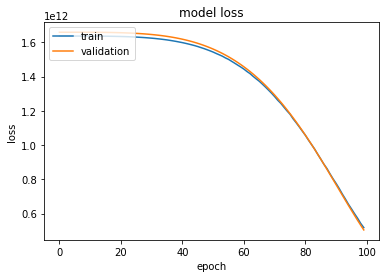

In [27]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 658452.989542486
MSE: 504771345989.08026
RMSE: 710472.6215619292
R2 Square -3.2773490341543026
...
Train set evaluation:
_____________________________________
MAE: 651334.3738559242
MSE: 496193192740.5782
RMSE: 704409.818742313
R2 Square -2.89261092461877
...


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 94314.22836129727
MSE: 14152094716.881275
RMSE: 118962.57695965264
R2 Square 0.8800774862727215
...
Train set evaluation:
_____________________________________
MAE: 35303.49718256236
MSE: 1987701866.291863
RMSE: 44583.650212739005
R2 Square 0.9844065776943093
...


In [30]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 87205.73051513635
MSE: 11720932765.1323
RMSE: 108263.25676392845
R2 Square 0.9006787511995368
...
Train set evaluation:
_____________________________________
MAE: 73692.56848247407
MSE: 9363827731.341503
RMSE: 96766.87310924903
R2 Square 0.9265412370493262
...
